# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

## Importing the dataset

In [2]:
dataset = pd.read_csv('Boston_Housing.csv')
dataset.head
dataset.dtypes

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
B            float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object

In [3]:
dataset.isnull().sum()
#dataset.describe()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [4]:
final = dataset
final

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


## First prediction

In [5]:
X = final.drop(['ZN','INDUS','AGE','RAD','TAX','MEDV','CAT. MEDV','NOX','DIS','PTRATIO','B','LSTAT'], axis='columns')
y = final.MEDV
X.head

<bound method NDFrame.head of         CRIM  CHAS     RM
0    0.00632     0  6.575
1    0.02731     0  6.421
2    0.02729     0  7.185
3    0.03237     0  6.998
4    0.06905     0  7.147
..       ...   ...    ...
501  0.06263     0  6.593
502  0.04527     0  6.120
503  0.06076     0  6.976
504  0.10959     0  6.794
505  0.04741     0  6.030

[506 rows x 3 columns]>

In [6]:
#print(X)
#plt.scatter(X,y) Error
display(final.corr())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)
regressor.coef_

array([-0.26072441,  3.76303705,  8.27817981])

In [8]:
regressor.intercept_

-28.810682506359118

What is the median house price for (not bound Charles river, crime rate of 0.00632, avg number of rooms 6.575)?

In [9]:
regressor.predict([[0.00632,0,6.575]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.61670198])

### **Exploration & Correlation**

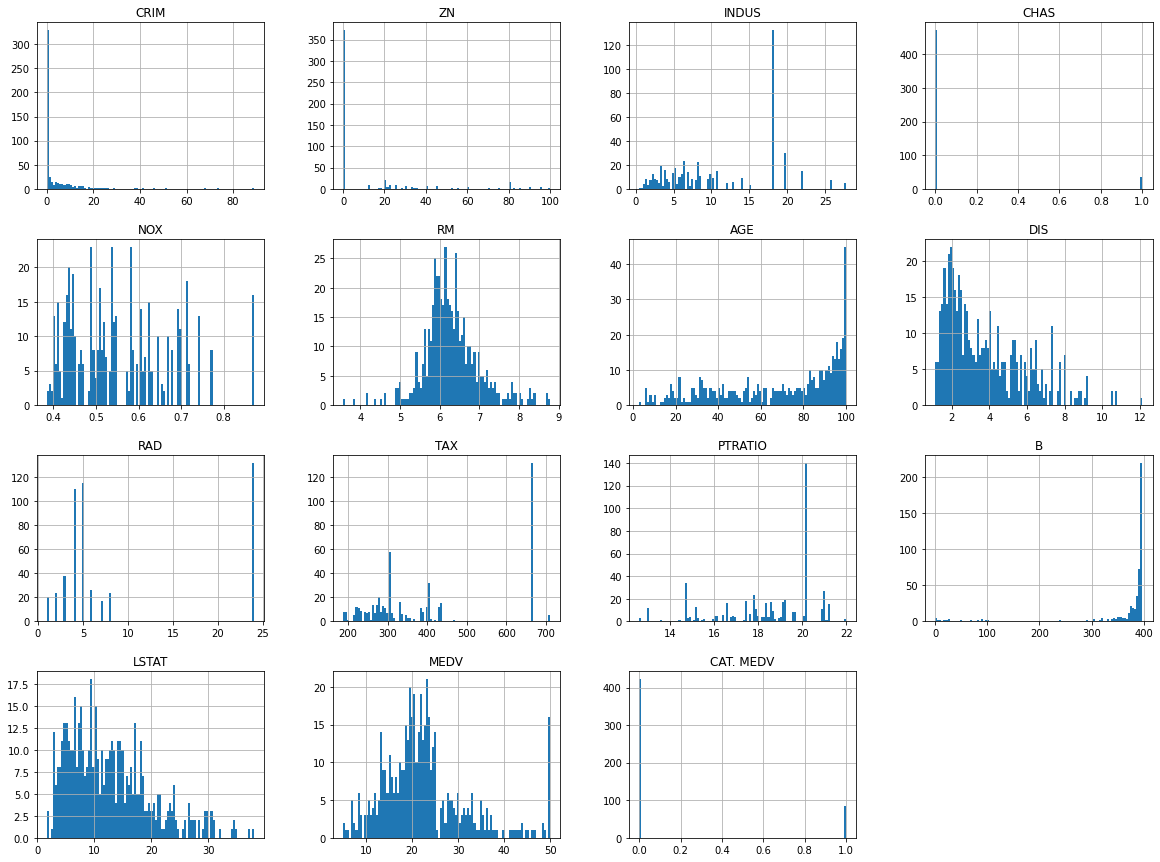

In [10]:
import matplotlib.pyplot as plt
dataset.hist(bins=100, figsize=(20,15))
plt.show()

                 ZN     INDUS       NOX       AGE       DIS       RAD  \
ZN         1.000000 -0.533828 -0.516604 -0.569537  0.664408 -0.311948   
INDUS     -0.533828  1.000000  0.763651  0.644779 -0.708027  0.595129   
NOX       -0.516604  0.763651  1.000000  0.731470 -0.769230  0.611441   
AGE       -0.569537  0.644779  0.731470  1.000000 -0.747881  0.456022   
DIS        0.664408 -0.708027 -0.769230 -0.747881  1.000000 -0.494588   
RAD       -0.311948  0.595129  0.611441  0.456022 -0.494588  1.000000   
RAD       -0.311948  0.595129  0.611441  0.456022 -0.494588  1.000000   
TAX       -0.314563  0.720760  0.668023  0.506456 -0.534432  0.910228   
PTRATIO   -0.391679  0.383248  0.188933  0.261515 -0.232471  0.464741   
B          0.175520 -0.356977 -0.380051 -0.273534  0.291512 -0.444413   
LSTAT     -0.412995  0.603800  0.590879  0.602339 -0.496996  0.488676   
MEDV       0.360445 -0.483725 -0.427321 -0.376955  0.249929 -0.381626   
CAT. MEDV  0.365296 -0.366276 -0.232502 -0.191196  

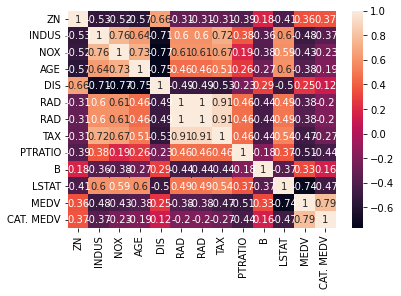

In [ ]:
# Numeric columns of the dataset
numeric_col = ['ZN','INDUS','NOX','AGE','DIS','RAD','RAD','TAX','PTRATIO','B','LSTAT','MEDV','CAT. MEDV']
 
# Correlation Matrix formation
corr_matrix = dataset.loc[:,numeric_col].corr()
print(corr_matrix)
 
#Using heatmap to visualize the correlation matrix
sn.heatmap(corr_matrix, annot=True)


In [11]:
#print(X)
#plt.scatter(X,y) Error
display(final.corr())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


In [12]:
X = final.drop(['CRIM','INDUS','AGE','RAD','TAX','MEDV','CAT. MEDV'], axis='columns')
y = final.MEDV
X

,ZN,CHAS,NOX,RM,DIS,PTRATIO,B,LSTAT
0,18.0,0,0.538,6.575,4.0900,15.3,396.90,4.98
1,0.0,0,0.469,6.421,4.9671,17.8,396.90,9.14
2,0.0,0,0.469,7.185,4.9671,17.8,392.83,4.03
3,0.0,0,0.458,6.998,6.0622,18.7,394.63,2.94
4,0.0,0,0.458,7.147,6.0622,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...
501,0.0,0,0.573,6.593,2.4786,21.0,391.99,9.67
502,0.0,0,0.573,6.120,2.2875,21.0,396.90,9.08
503,0.0,0,0.573,6.976,2.1675,21.0,396.90,5.64
504,0.0,0,0.573,6.794,2.3889,21.0,393.45,6.48


## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.coef_
regressor.intercept_

35.55534452239608

## Predicting the Test set results & Performance

In [15]:
y_pred = regressor.predict(X_test)
#np.set_printoptions(precision=2)
#print(np.concatenate(y_pred, y_test))

In [16]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)




Root Mean Square Error:

5.324616372082099


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


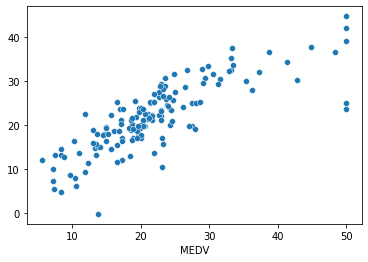

In [ ]:
sn.scatterplot(y_test, y_pred)